In [21]:
# This is the first part of (1/2), final project of Harris-IPPP Fall 2017
# Authors are:
    #Tianyuan Bai
    #Yuanlong Liu

In [22]:
import pandas as pd

import numpy as np

from matplotlib import pyplot as plt

import csv

import seaborn as sns

import statsmodels.formula.api as sm


#Below we let python read the two csv files here, one country data and one soccer data, respectively.
#We pulled the dataset from mainly two sources: 


#1.Data Cleaning

#1.1
#The soccer data: transfermarkt.com
    #This is the most comprehensive website that covers all transfer market activities across almost all soccer leagues in the world. 
    #The data we extracted here includes: the sum amount of money spent in purchasing players in each country,
            #sum amount of money gained via selling players; in 2012 and 2017 respectively, where:
        #we only look at top-50 markets in terms of transfer fee spent on an annual basis.  

#1.1.2
        #Because one country may feature more than one market, ie. UK has the Premier League, The Scottish Premiership, The Championship, The League One, 
            #all of which are top 50 markets. 
        #If we treat them as separate markets, it doesn't make sense. 
        #If so, there's mismatch between a country as a whole, and its sub-regions.
        #For instance, when we run regression of UK's economic growth on the English league, the Scottish League,
            #UK's economic growth not only contributes to its leagues one by one, respectively; but instead,
                #the economic relationship between these markets are interlocked. 
       # Hence to avoid confusion, if several markets belong to a single one host country, we merge them into one league.
            #This is the case for the UK, France, Spain, Germany, Italy, Netherlands, Portugal and China. 
        
#1.1.3 
        #We are interested in more than clubs' annual spending and income of 2012 and 2017 per se. Hence,
            #we manually calculated the log change of soccer expenditure and income, comparing 2017's with 2012's. 

soccer=pd.read_csv("soccer.csv")
dictobj = csv.DictReader(open("soccer.csv"))

In [23]:
#1.2.1
#The country data: imf.org/external/pubs/ft/weo/2017/02/weodata/index.aspx
    #We used the official IMF data for annual GDP in dollars, inflation rate, unemployment rate.
        #some of the data aren't available via IMF, they are:
            #Argentina's 2016 inflation rate; 
            #Qatar's, Saudi Arabia's and UAE's unemployment rate.
        #So we found them in the world bank's databse. 
        #Qatar's unemployment rate is astonishingly low, at 0.23% in 2016. 
            #We assumed it's because the labor force participation rate is also incredibly low, especially for its citizens and females. 

#1.2.2
#Similarly, we also added log change of GDP growth, inflation growth and unemployment growth, comparing 2016's data with 2011's.

#1.2.3
#At this point, the correlation we attempt to find is between:
    #the log change of economic activities (2016 vs. 2011) and the log change of transfer market activities (2017 vs. 2012)
        #We didn't use a complete matching as 2012 economic data - 2012 soccer data, but in contrast, 
                #2011 economic data, - 2012 soccer data, because we believe just like any other exogenous shocks, 
                    #there's lag in transferring economic grwoth to soccer investment. 

country=pd.read_csv("country.csv")
dictobj = csv.DictReader(open("country.csv"))


In [24]:
#2. Summary Statistics at a glance

#2.1 Here we merge the economic data with the soccer data, by country. There are in total 40 observations, in other words,
        #40 economies and 40 transfer markets. 


mergedsheet = pd.merge(country,
                    soccer,
                    on='Country')

In [25]:
print(mergedsheet)

            Country    2011GDP    2016GDP  GDP Log Change  2011 Inflation  \
0         Argentina    447.644    544.735        0.216893           9.775   
1           Austria    419.243    386.587       -0.077893           3.600   
2           Belgium    513.396    466.559       -0.091230           3.469   
3            Brazil   2,492.91   1,798.62       -0.278506           6.636   
4          Bulgaria     53.514      52.39       -0.021004           3.389   
5             China   7,298.15  11,232.11        0.539035           5.417   
6          Colombia    328.422    282.357       -0.140262           3.416   
7           Croatia     63.842     50.731       -0.205366           2.260   
8            Cyprus     24.949      19.81       -0.205980           3.486   
9    Czech Republic    215.265    195.328       -0.092616           1.929   
10          Denmark    333.238    306.734       -0.079535           2.757   
11            Egypt    235.719    332.349        0.409937          11.068   

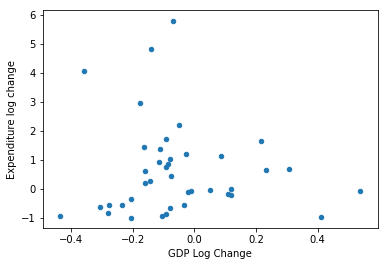

In [26]:
# Scatterplot for a better view

#3.1 We are then interested in how the correlation between economy and soccer investment is distributed in a scatterplot, for each observation.

mergedsheet.plot(kind='scatter', x = 'GDP Log Change', y = 'Expenditure log change')
plt.show()

In [27]:
# Multi-variate OLS

#4.1 It may be useful to construct a linear regression model to estimate the effect of GDP growth (GDP Log Change), 
        #on soccer investment (Expenditure log change)
    
#4.2 We added instrumental variables to account for unobserved, institutional and cultural effects on soccer spending,
        #which are external to the economic data we pulled. 

Y = mergedsheet['Expenditure log change']
X1 = mergedsheet['GDP Log Change']
X2 = mergedsheet['Inflation Log Change']
X3 = mergedsheet['Unemployment Log Change']
X4 = mergedsheet['Europe']
X5 = mergedsheet ['Asia']
X6 = mergedsheet ['America']


In [28]:
model = sm.ols(formula = 'Y ~ X1+ X2 + X3 + X4 + X5 + X6', data = mergedsheet).fit()

In [29]:
model.summary()

# OLS cont.

#5.1 We find that with very limited observations, very limited explanatory variables, this model has an R-square at 0.242.

#5.1.1 Nevertheless at 5% level, only two explanatory variables are statistically significant. They are unemployment and America.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     1.758
Date:                Fri, 01 Dec 2017   Prob (F-statistic):              0.139
Time:                        17:00:58   Log-Likelihood:                -68.569
No. Observations:                  40   AIC:                             151.1
Df Residuals:                      33   BIC:                             163.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7678      0.855     -0.898      0.376      -2.507       0.971
X1            -0.5097      1.329     -0.383      0.704      -3.214       2.195
X2            -0.0181      0.268     -0.067      0.947      -0.562       0.526
X3            -1.5475      0.762     -2.031      0.050      -3.098       0.003
X4             1.5161      0.951      1.594      0.121      -0.419       3.451
X5             0.1704      1.103      0.155      0.878      -2.073       2.414
X6             2.2849      1.105      2.068      0.047       0.037       4.533
==============================================================================
Omnibus:                       21.289   Durbin-Watson:                   1.724
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.292
Skew:                           1.606   Prob(JB):                     2.64e-07
Kurtosis:                       5.804   Cond. No.                         11.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
sns.regplot(data = mergedsheet, x = X1, y = Y)


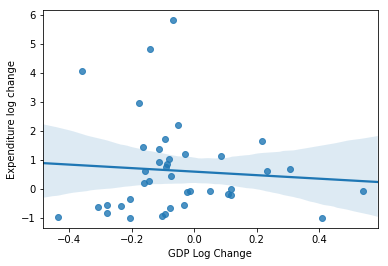

In [31]:
plt.show()


#6. A much simpler OLS with one variable. Are there outliers? 

#6.1 for a better and simpler examination, we only look at the correlation between soccer expenditure, and GDP growth. 

#we find that the correlation is negative, implying that given more GDP growth, the increase of soccer expenditure in fact diminishes

#6.2 But then a further look at the plot shows that it's likely that some outliers have affected the correlation, therefore
    #we ask, are there indeed outliers? 

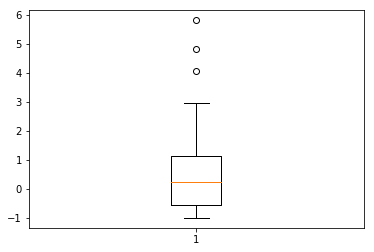

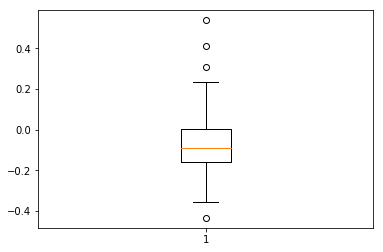

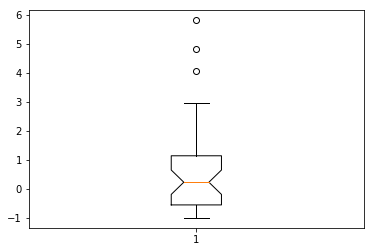

In [32]:
plt.boxplot(mergedsheet['Expenditure log change'])
plt.show()

plt.boxplot(mergedsheet['GDP Log Change'])
plt.show()

plt.boxplot(mergedsheet['Expenditure log change'], ['GDP Log Change'])
plt.show()

#6.3 Using box plots, we indeed find outliers in economic data, in soccer data and in the combined setting. 
    # in the second half of this study, we excluded outlier observations in the soccer data, which are:
        #Greece with an investment increase at 406%,
        #Colombia at 482%,
        #Slovakia at 581%. 
        
    # The economic data outliers are 
        #China with overall GDP growth at 54%
        #Egypt at 40.9%
        #Greece at 35.7%
        #Ukraine at -43%